# Práctica 4: Clasificación Lineal. Perceptron.

## Realizado por:
- Susana Suárez Mendoza
- Mara Pareja del Pino

In [1]:
import pandas as pd
from sklearn import model_selection,linear_model,datasets
import matplotlib.pyplot as plt
import numpy as np

### Ejercicio 1: Obtención de superficies de decisión.

1. Generar un conjunto de datos que contenga solo las muestras pertenecientes a las clases setosa y versicolor del conjunto de datos original.

In [46]:
data_csv = pd.read_csv('./iris_pca_2d.csv', sep = ',')
setosa_versicolor = data_csv[data_csv['clase'].isin(['setosa', 'versicolor'])]
df = setosa_versicolor.to_numpy()

2. Dividir el conjunto anterior en entrenamiento (70%) y test (30).

In [3]:
data_x = df[:, :-1]
data_y = df[:, -1]

#Función train_test_split.
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=0.30, 
                                                                    train_size = 0.70, random_state=42)

3. Entrenar un clasificador lineal utilizando la clase Perceptron.

In [4]:
model = linear_model.Perceptron(random_state = 0)
clf = model.fit(x_train, y_train)
w = clf.coef_
b = clf.intercept_
print("Pesos:" ,w, "\nIntercept:", b)

Pesos: [[ 1.23339803 -1.6160349 ]] 
Intercept: [1.]


4. Mostrar un gráfico con las muestras de entrenamiento de las dos clases en rojo y azul, y la superficie de decisión en negro.

5. Mostrar un gráfico con las muestras de test de las dos clases en rojo y azul, y la superficie de decisión en negro.

In [5]:
#Cálculo de la superficie de decisión.
def decision_surface(x):
    return (-b - w[0][0]*x) / w[0][1]

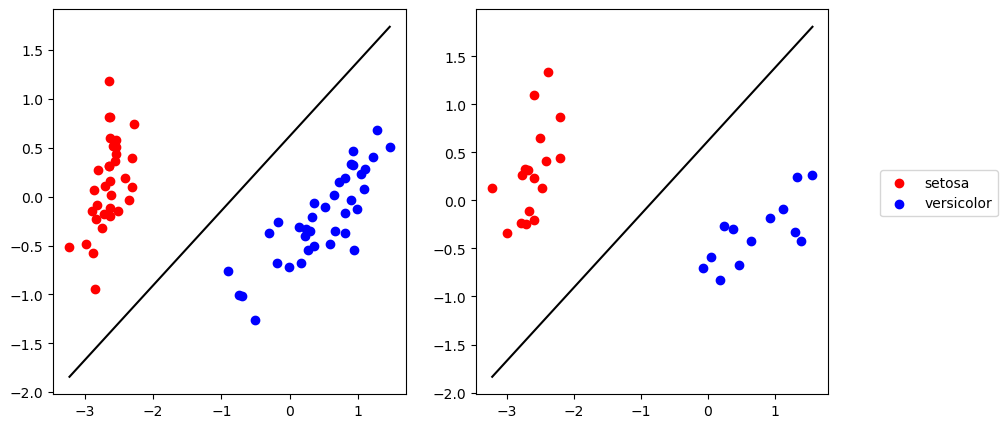

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.scatter(x_train[y_train == "setosa", 0], x_train[y_train == "setosa", 1], c="red")
ax1.scatter(x_train[y_train == "versicolor", 0], x_train[y_train == "versicolor", 1], c="blue")

x_decision = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 100)
y_decision = decision_surface(x_decision)

ax1.plot(x_decision, y_decision, c='black')


ax2.scatter(x_test[y_test == "setosa", 0], x_test[y_test == "setosa", 1], c="red")
ax2.scatter(x_test[y_test == "versicolor", 0], x_test[y_test == "versicolor", 1], c="blue")

x_decision = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 100)
y_decision = decision_surface(x_decision)
ax2.plot(x_decision, y_decision, c='black')
plt.legend(labels = ["setosa","versicolor"], loc = "upper right", bbox_to_anchor=(1.5,0.6))
plt.show()

6. Explicar los resultados obtenidos de acuerdo a las gráficas (separación de la superficie de las muestras, muestras mal clasificadas, ...)

En este apartado observamos que la superficie decisión divide claramente la clase setosa de la clase versicolor. En la gráfica del entrenamiento vemos correctamente la clasificación (graf izda.) al igual que en la gráfica de test (graf drch.).

7. Generar un conjunto de datos que contenga solo las muestras pertenecientes a las clases setosa y virginica del conjunto de datos original y repetir los pasos 2-6.

**Setosa y virginica.**

In [48]:
setosa_virginica = data_csv[data_csv['clase'].isin(['setosa', 'virginica'])]
df = setosa_virginica.to_numpy()

data_x = df[:, :-1]
data_y = df[:, -1]

#Función train_test_split.
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=0.30, 
                                                                    train_size = 0.70, random_state=42)

model = linear_model.Perceptron(random_state = 0)
clf = model.fit(x_train, y_train)
pesos = clf.coef_
interseccion = clf.intercept_
print(pesos, interseccion)

[[2.88899057 0.14494943]] [-1.]


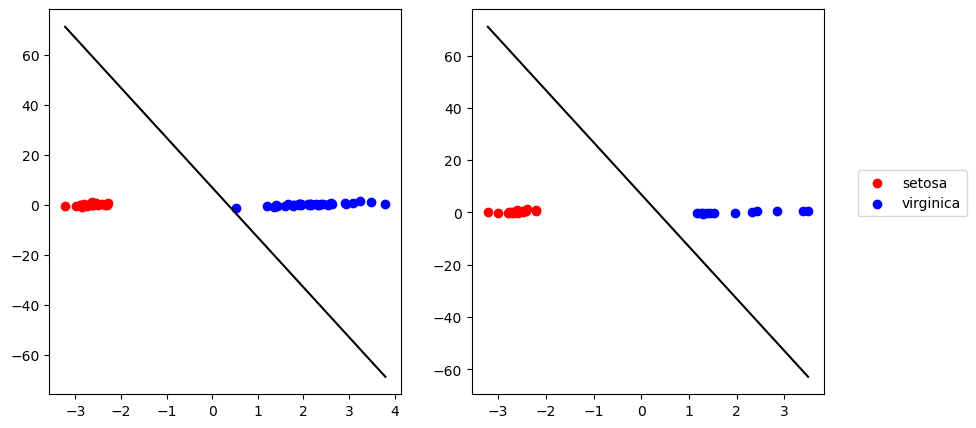

In [42]:
w = pesos
b =interseccion

fig, (ax,ax2) = plt.subplots(1,2,figsize = (10,5))
ax.scatter(x_train[y_train == "setosa", 0], x_train[y_train == "setosa", 1], c="red")
ax.scatter(x_train[y_train == "virginica", 0], x_train[y_train == "virginica", 1], c="blue")

x_decision = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 100)
y_decision = decision_surface(x_decision)
ax.plot(x_decision, y_decision, c='black')

ax2.scatter(x_test[y_test == "setosa", 0], x_test[y_test == "setosa", 1], c="red")
ax2.scatter(x_test[y_test == "virginica", 0], x_test[y_test == "virginica", 1], c="blue")

x_decision = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 100)
y_decision = decision_surface(x_decision)
ax2.plot(x_decision, y_decision, c='black')
plt.legend(labels = ["setosa","virginica"], loc = "upper center",  bbox_to_anchor=(1.25,0.6))

plt.show()

En este apartado, al igual que en el anterior, observamos que la superficie decisión divide claramente ambas clases. En la gráfica del entrenamiento vemos correctamente la clasificación (graf izda.) al igual que en la gráfica de test (graf drch.).

**Versicolor y virginica.**

In [50]:
versicolor_virginica = data_csv[data_csv['clase'].isin(['versicolor', 'virginica'])]
df = versicolor_virginica.to_numpy()

data_x = df[:, :-1]
data_y = df[:, -1]

#Función train_test_split.
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=0.30, 
                                                                    train_size = 0.70, random_state=42)

model = linear_model.Perceptron(random_state = 0)
clf = model.fit(x_train, y_train)
pesos = clf.coef_
interseccion = clf.intercept_
print(pesos, interseccion)

[[ 2.33694337 -2.43477402]] [-3.]


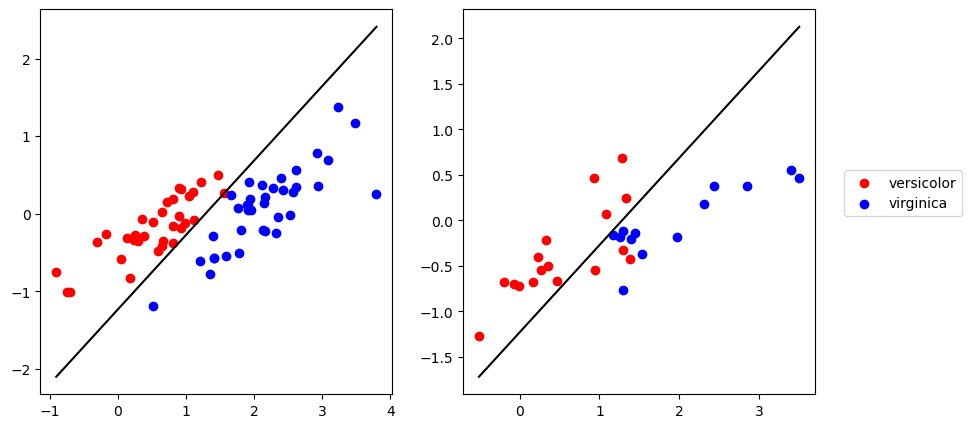

In [51]:
w = pesos
b =interseccion

fig, (ax, ax2) = plt.subplots(1,2,figsize = (10,5))
ax.scatter(x_train[y_train == "versicolor", 0], x_train[y_train == "versicolor", 1], c="red")
ax.scatter(x_train[y_train == "virginica", 0], x_train[y_train == "virginica", 1], c="blue")

x_decision = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 100)
y_decision = decision_surface(x_decision)
ax.plot(x_decision, y_decision, c='black')
ax2.scatter(x_test[y_test == "versicolor", 0], x_test[y_test == "versicolor", 1], c="red")
ax2.scatter(x_test[y_test == "virginica", 0], x_test[y_test == "virginica", 1], c="blue")

x_decision = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 100)
y_decision = decision_surface(x_decision)
ax2.plot(x_decision, y_decision, c='black')
plt.legend(labels = ["versicolor","virginica"], loc = "upper center",  bbox_to_anchor=(1.25,0.6))
plt.show()

Al contrario que las dos gráficas anteriores, en estas podemos observar que los datos no se pueden clasificar mediante la superficie de decisión. En la gráfica de entrenamiento (izda.) hace dicha clasificación correctamente, sin embargo, en la gráfica de test (dcha.) aparecen muestras de versicolor en el lado de virginica por lo que podmeos concluir que dichas clases no se pueden separara mediante este clasificador lineal.

### Ejecicio 2: Clasificación de muestras.

Definición del conjunto de datos.

In [53]:
X,y = datasets.make_blobs(n_samples=100,
                          n_features=2,
                          centers=[[0,0], [2,2], [2,0]],
                          cluster_std=0.6,
                          random_state=123)

1. Dividir el conjunto de datos en entrenamiento (70%) y test (30%).

In [54]:
#Función train_test_split.
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, 
                                                                    train_size = 0.70, random_state=42)

2. Entrenar un clasificador lineal con la clase Perceptron.

In [56]:
model = linear_model.Perceptron(random_state = 0)
clf = model.fit(x_train, y_train)

3. Obtener la clasificación de las muestras de test utilizando la funcion decision_function.

In [58]:
y_pred = clf.decision_function(x_test)

4. Mostrar el porcentaje de muestras de test correctamente clasificadas con respecto al número de muestras de test.

In [59]:
maximos = []
for row in y_pred:
    maxi = np.argmax(row)
    maximos.append(maxi)

In [60]:
coincidencias = maximos == y_test
coincidencias = sum(coincidencias)
acierto = coincidencias/len(maximos)

In [61]:
print("El porcentaje de acierto del clasificador Perceptor es del", round(acierto*100,2), "%.")

El porcentaje de acierto del clasificador Perceptor es del 86.67 %.


Tras haber realizado este ejercicio y dados los resultados hemos concluido que el clasifica